# Introducción a la visión artificial

## Paquetes requeridos
- numpy: tratamiento de matrices y vectores
- matplotlib: visualización
- imageio: leer y guardar imágenes
- scikit-image: conversión de color a RGB

In [38]:
!pip install numpy
!pip install matplotlib
!pip install imageio
!pip install scikit-image

In [39]:
# importar paquetes
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage import color

In [40]:
archivo = './storage/image/gray-wolf.jpg'
imgIn = imageio.imread(archivo)

C:\Users\pca20\AppData\Local\Temp\ipykernel_19768\3413244162.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imgIn = imageio.imread(archivo)


In [41]:
# caracteristicas de la imagen = matriz w * h * 3
print('Dimensiones de la imagen:', imgIn.shape)

Dimensiones de la imagen: (640, 960, 3)


In [42]:
print('Pixel en ubicacion [0,0,:]', imgIn[0,0,:])

Pixel en ubicacion [0,0,:] [134  88  54]


In [43]:
print('Tipo de dato: ', imgIn.dtype)

Tipo de dato:  uint8


In [44]:
# rango de valores contenidos en la matriz (por color)
print('Valor maximo: ', imgIn.max())
print('Valor minimo: ', imgIn.min())

Valor maximo:  255
Valor minimo:  0


## Visualización de la imagen

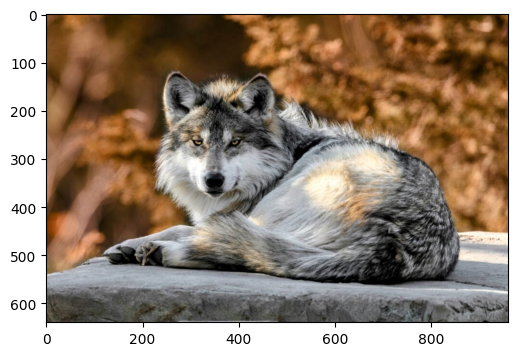

In [45]:
plt.imshow(imgIn);

In [46]:
imgGray = color.rgb2gray(imgIn)
print('Dimensiones en la escala de grises: ', imgGray.shape)
print('Tipo de dato de contenido:  ', imgGray.dtype)

Dimensiones en la escala de grises:  (640, 960)
Tipo de dato de contenido:   float64


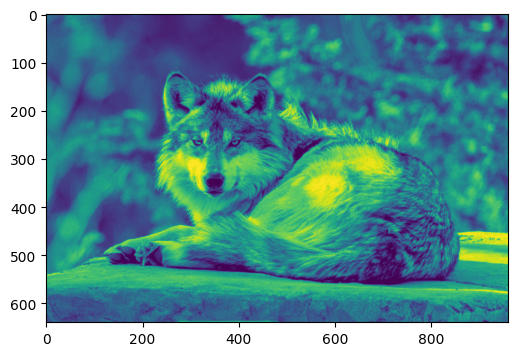

In [47]:
plt.imshow(imgGray);

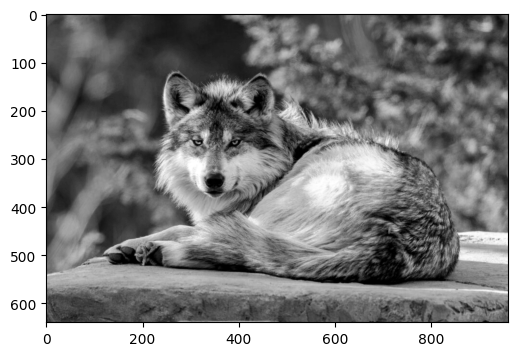

In [48]:
plt.imshow(imgGray, cmap='gray');

## Manipulacion de la imagen

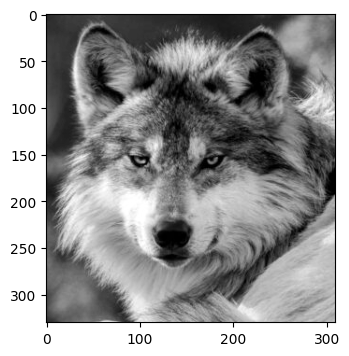

In [49]:
# seccion de la imagen
imgSeccion = imgGray[110:440, 215:525]
plt.imshow(imgSeccion, cmap='gray');

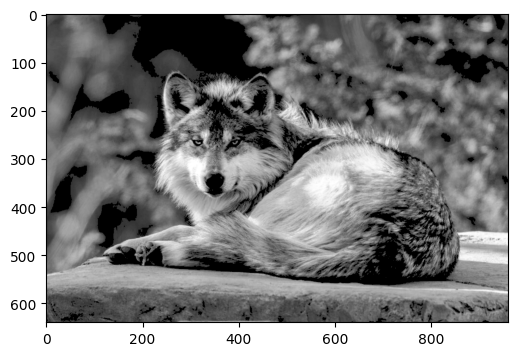

In [50]:
# cambio de valores en la matriz de color
imgModificada = imgGray.copy()
imgModificada[imgModificada < 0.2] = 0.0
plt.imshow(imgModificada, cmap='gray');

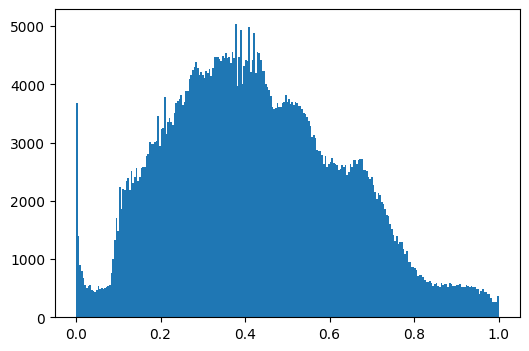

In [51]:
# distribucion de valores de los pixeles
_ = plt.hist(imgGray.flatten(), bins=np.linspace(0, 1, 256))

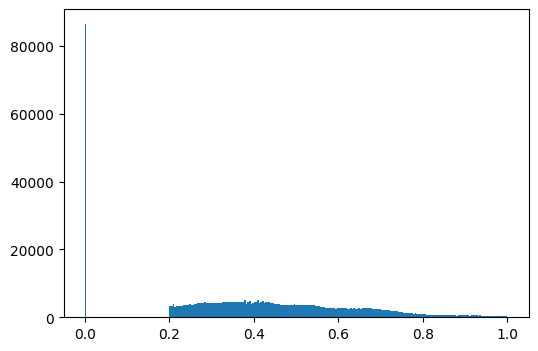

In [52]:
_ = plt.hist(imgModificada.flatten(), bins=np.linspace(0, 1, 256))


In [53]:
imageio.imwrite('./storage/image/lobo-modificada.jpg', (255*imgModificada).astype('uint8'))

## Introducción a Open CV

In [54]:
# Biblioteca Open CV
import cv2
import common
# Para control de dimensiones de la imagen
import pylab

In [55]:
pylab.rcParams['figure.figsize'] = (6.0, 4.0)

In [56]:
archivo = './storage/image/wall-e.jpg'
input_image = cv2.imread(archivo)

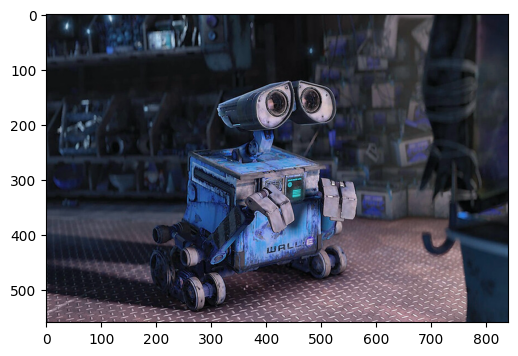

In [57]:
plt.imshow(input_image);

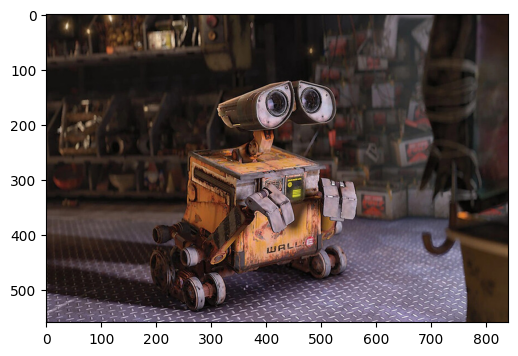

In [58]:
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB));

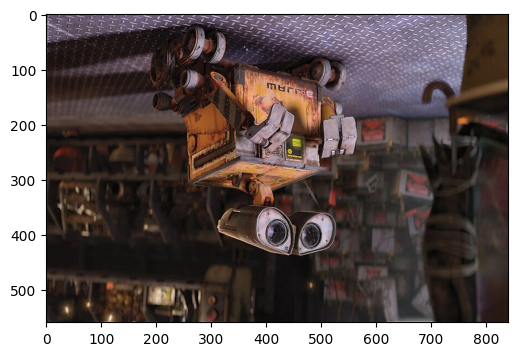

In [59]:
# Inversión vertical de la imagen
flipped_img = cv2.flip(input_image, 0)
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB));

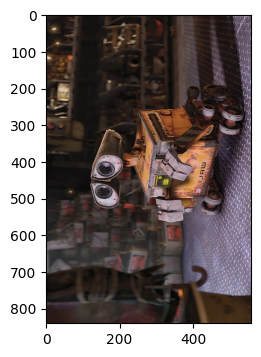

In [60]:
transpuesta = cv2.transpose(input_image)
plt.imshow(cv2.cvtColor(transpuesta, cv2.COLOR_BGR2RGB));

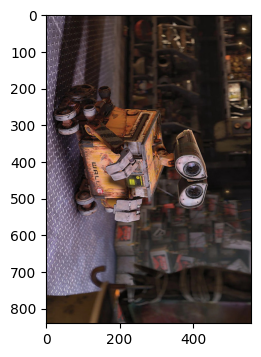

In [61]:
plt.imshow(cv2.cvtColor(cv2.flip(transpuesta, 1), cv2.COLOR_BGR2RGB));

In [62]:
for i in range(0, 3):
    minimo, maximo, min_loc, max_loc = cv2.minMaxLoc(input_image[:,:,i])
    print('min {}, esta ubicado en {} y el max {}, esta ubicado en {}'.format(minimo, min_loc, maximo, max_loc))

min 0.0, esta ubicado en (158, 2) y el max 255.0, esta ubicado en (393, 143)
min 0.0, esta ubicado en (254, 2) y el max 255.0, esta ubicado en (521, 309)
min 0.0, esta ubicado en (275, 48) y el max 255.0, esta ubicado en (396, 141)


## Operaciones aritméticas con Open CV

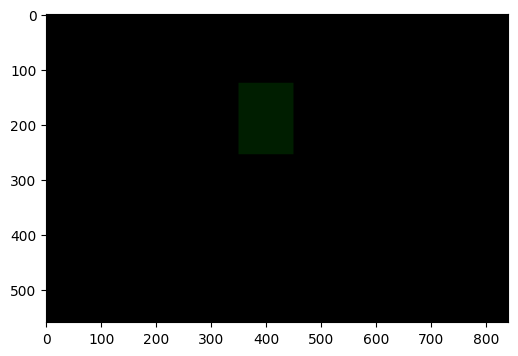

In [63]:
blank_image = np.zeros(input_image.shape, dtype='uint8')
blank_image[125:255, 350:450, 1] = 30
plt.imshow(blank_image);

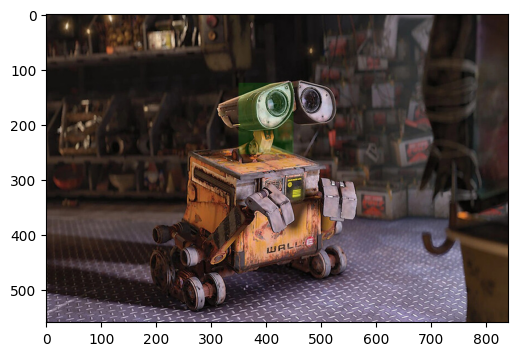

In [64]:
nueva = cv2.cvtColor(cv2.add(input_image, blank_image), cv2.COLOR_BGR2RGB)
plt.imshow(nueva);

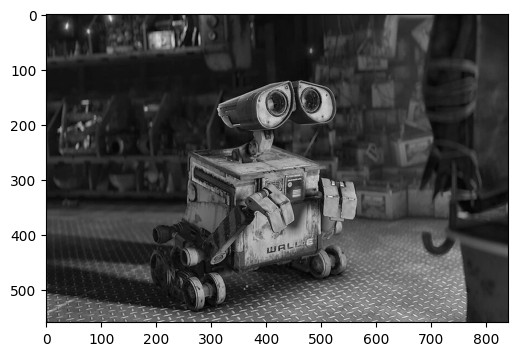

In [65]:
grayImage = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage, cmap='gray');

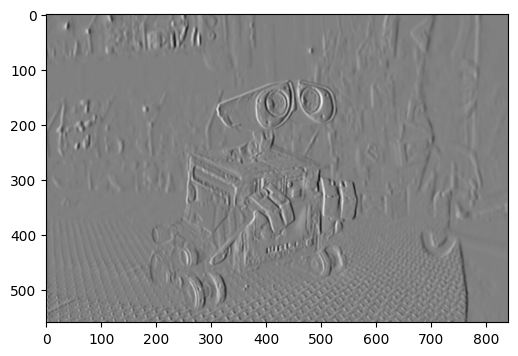

In [66]:
sobelX = cv2.Sobel(grayImage, cv2.CV_64F, 1, 0, ksize=9)
plt.imshow(sobelX, cmap='gray');

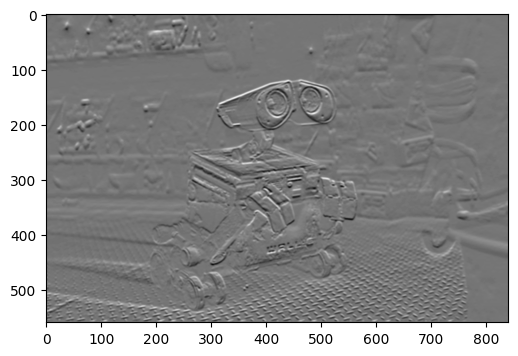

In [67]:
sobelY = cv2.Sobel(grayImage, cv2.CV_64F, 0, 1, ksize=9)
plt.imshow(sobelY, cmap='gray');

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


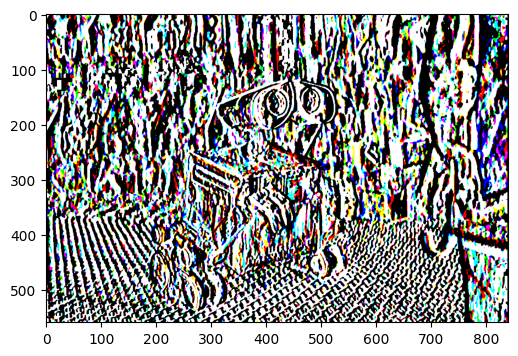

In [68]:
sobel_x_color = cv2.Sobel(input_image, cv2.CV_64F, 1, 0, ksize=9)
plt.imshow(sobel_x_color);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


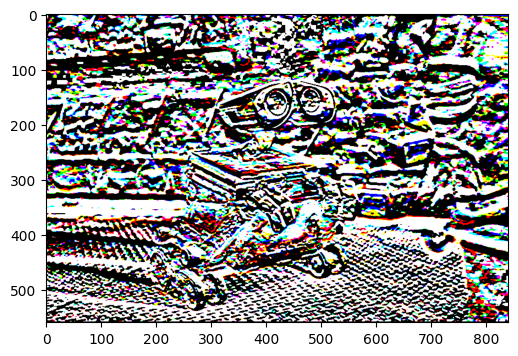

In [69]:
sobel_y_color = cv2.Sobel(input_image, cv2.CV_64F, 0, 1, ksize=9)
plt.imshow(sobel_y_color);

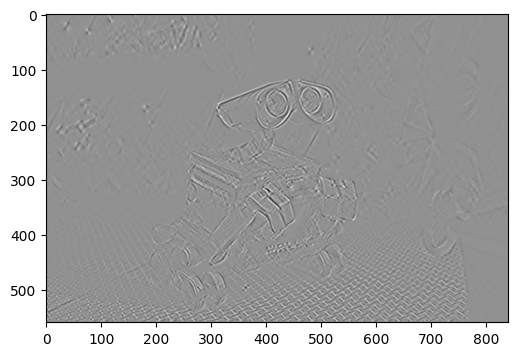

In [74]:
sobelXY = cv2.Sobel(grayImage, cv2.CV_64F, 1, 1, ksize=9)
plt.imshow(sobelXY, cmap='gray');
